In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

```
1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.

2. 탐색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.

3. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.

4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.

5. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.

6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.
```

### 1. Dataset 확인 

In [7]:
#1. Dateset 확인
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1-1. Null Data check

In [11]:
#1-1. Null data check
for col in df_train.columns:
    msg='column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value : 0.00%
column :   Survived	 Percent of NaN value : 0.00%
column :     Pclass	 Percent of NaN value : 0.00%
column :       Name	 Percent of NaN value : 0.00%
column :        Sex	 Percent of NaN value : 0.00%
column :        Age	 Percent of NaN value : 19.87%
column :      SibSp	 Percent of NaN value : 0.00%
column :      Parch	 Percent of NaN value : 0.00%
column :     Ticket	 Percent of NaN value : 0.00%
column :       Fare	 Percent of NaN value : 0.00%
column :      Cabin	 Percent of NaN value : 77.10%
column :   Embarked	 Percent of NaN value : 0.22%


In [12]:
for col in df_test.columns:
    msg='column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col,100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value : 0.00%
column :     Pclass	 Percent of NaN value : 0.00%
column :       Name	 Percent of NaN value : 0.00%
column :        Sex	 Percent of NaN value : 0.00%
column :        Age	 Percent of NaN value : 20.57%
column :      SibSp	 Percent of NaN value : 0.00%
column :      Parch	 Percent of NaN value : 0.00%
column :     Ticket	 Percent of NaN value : 0.00%
column :       Fare	 Percent of NaN value : 0.24%
column :      Cabin	 Percent of NaN value : 78.23%
column :   Embarked	 Percent of NaN value : 0.00%


####  (해석) - Train, Test set 에서 Age( 둘 다 약 20%), Cabin (둘 다 약 80%), Embarked(Train만 0.22%) null data가 존재함을 알 수 있다.

#### - 시각화 (msno.matrix, msno.bar 이용)

msno.matrix(df를 시각화할 범위, figsize=(행사이즈, 열사이즈),color=(r,g,b)) - color defalut는 0.25,0.25,0.25

df.iloc - 숫자 인덱스 , df.loc - 문자 인덱스

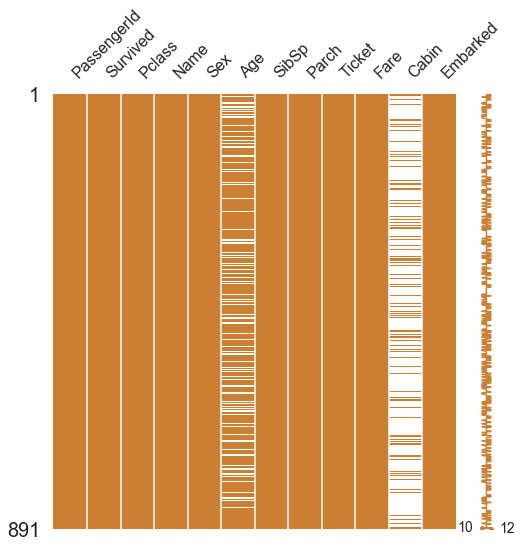

In [13]:
#mano library 를 통한 시각화
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

In [19]:
msno.matrix?

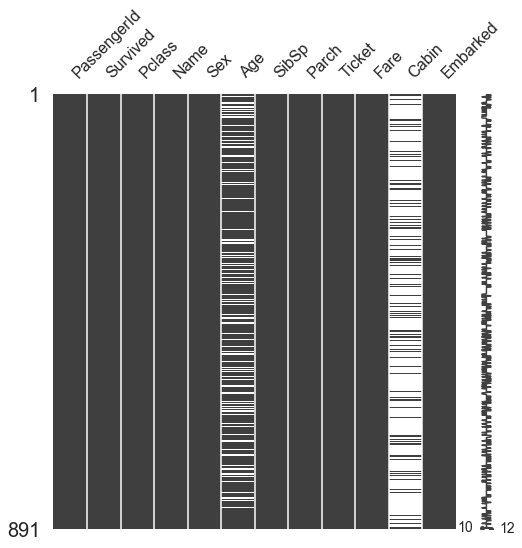

In [20]:
msno.matrix(df=df_train.iloc[:,:],filter="top",figsize=(8,8),color=(0.25,0.25,0.25))

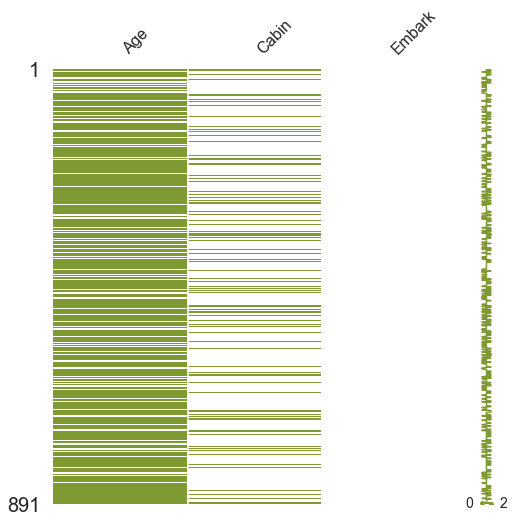

In [41]:
#train data 에서 null 값이 있는 column만 시각화.
msno.matrix(df=df_train.loc[:,["Age","Cabin","Embark"]],filter="top",figsize=(8,8),color=(0.5,0.6,0.2))

msno.bar - matrix와 사용법 동일 

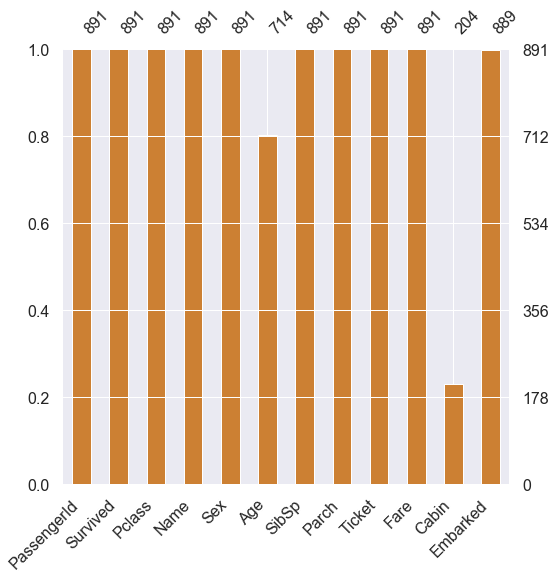

In [42]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

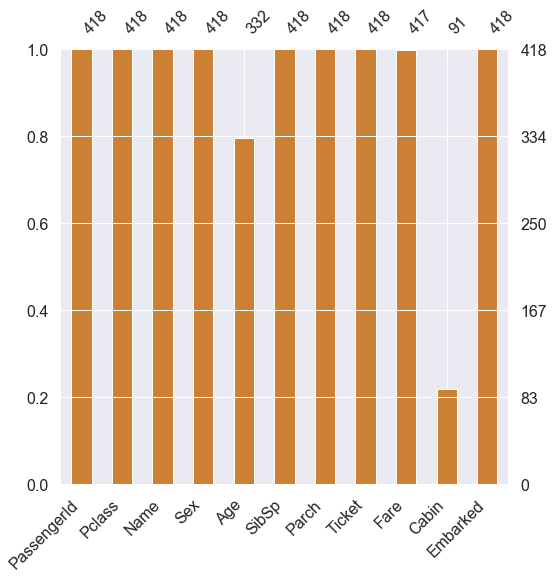

In [43]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8),color=(0.8,0.5,0.2))

### 1-2 Target Label 확인 

```
What - taget label의 distribution 확인

Why - 1과 0의 distribution에 따라 모델의 평가 방법이 달라질 수 있기 때문
```

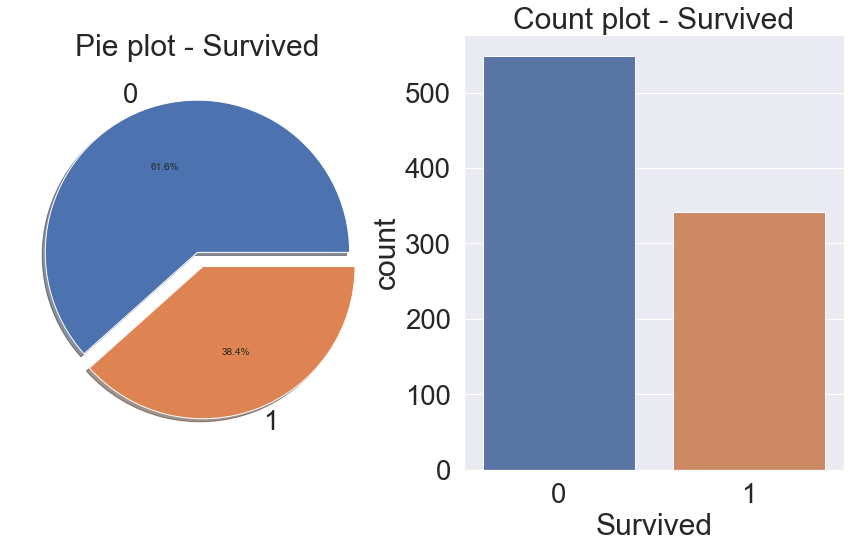

In [50]:
#시각화
f,ax=plt.subplots(1,2,figsize=(15,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%",ax=ax[0],shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title("Count plot - Survived")

plt.show()

#### (해석) - 0 : 죽은 사람, 1 : 살아남은 사람
####            - 38.4% 가 살아남았음.
####            - target label 의 분포가 제법 균일함.  만약 target label이 불균형하다면, 평가 지표로 정확도(Accuracy)를 쓸 수 없게 됨.

### 2. Exploratory data analysis

### 2.1 Pclass 
#### - ordinal, 서수형 데이터, 카테고리이며, 순서가 있는 데이터타입

groupby - index를 사용하고 싶은 않은 경우에는 as_index=False 를 설정하면 됨.

In [51]:
#Pclass 의 값 별로 속한 모든 사람 수 count
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [58]:
#Pclass 별 살아남은 사람 (Survived=1)
df_train[['Pclass','Survived']].groupby(["Pclass"],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [61]:
#Pclss 별 생존률
df_train[['Pclass','Survived']].groupby(["Pclass"],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


#### pandas의 crosstab 사용 version 

In [63]:
pd.crosstab(df_train["Pclass"],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


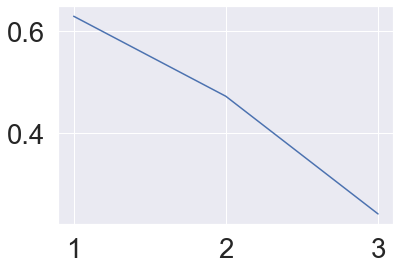

In [70]:
plt.plot(df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False))

In [71]:
plt.bar?

In [72]:
df_pclass=df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False)

In [76]:
df_pclass.index

Int64Index([1, 2, 3], dtype='int64', name='Pclass')

<BarContainer object of 3 artists>

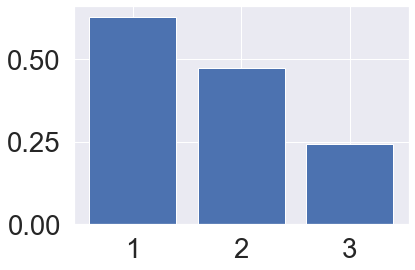

In [77]:
plt.bar(df_pclass.index,df_pclass['Survived'])

In [78]:
plt.bar?

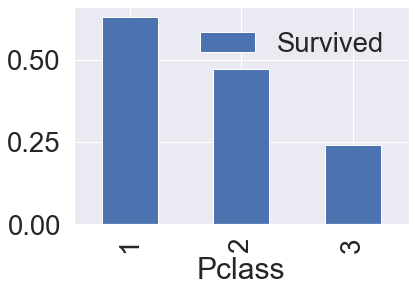

In [79]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

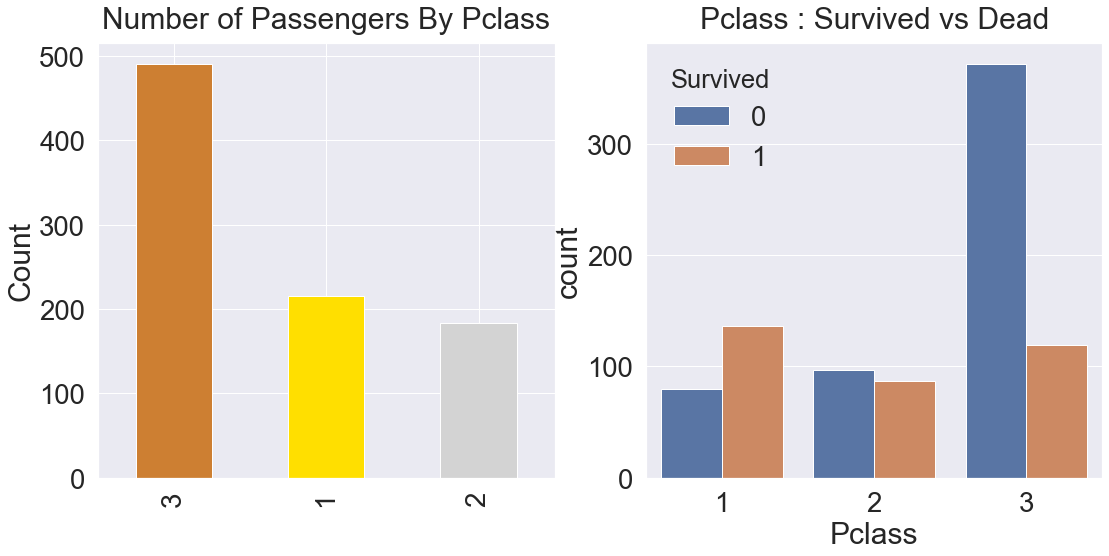

In [80]:
#seaborn 이용 version

y_position=1.02
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass',y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title("Pclass : Survived vs Dead",y=y_position)
plt.show()


(결과해석)
 - Pclass가 높을 수록 생존확률이 높은걸 확인 할 수 있음.
 - Survived에 Pclass가 큰 영향을 미치므로, 나중에 모델을 세울 때, 'Pclass'라는 feature을 사용하는 것이 좋을 것이라고 판단할 수 있음.

### 2.2 Sex 

 - Sex에 따른 생존률 파악.

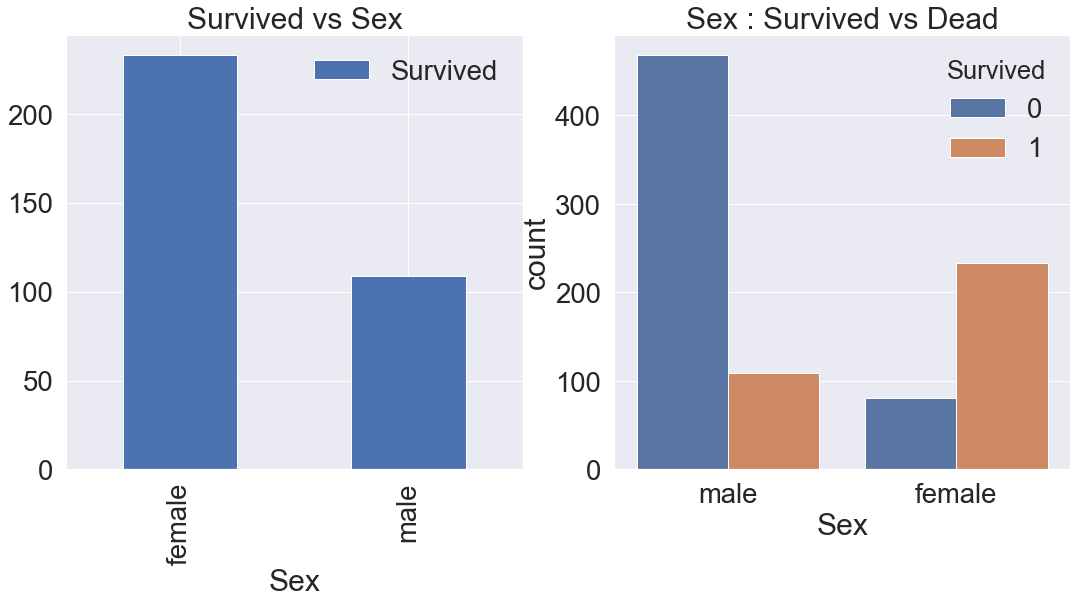

In [82]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).sum().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title("Sex : Survived vs Dead")
plt.show()


In [85]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


pd.crosstab(X, Y, margins).style.background_gradient(cmap=' ')

In [87]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


#### (결과 해석) - Sex도 예측 모델에 쓰일 중요한 feature 이다. 

### 2.3 Both Sex and Pclass 

 - seaborn 의 factorplot 이용하여 3개의 차원으로 이루어진 그래프 make!
 - sns.factorplot(x,y,hue,col,satureation) 
 - hue는 hue 값별로 같은 그래프에 표시
 - col은 col 값 별로 다른 그래프에 표시

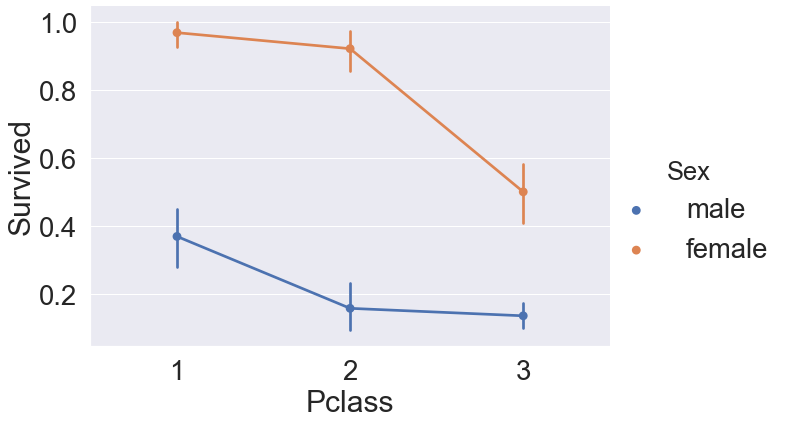

In [88]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)

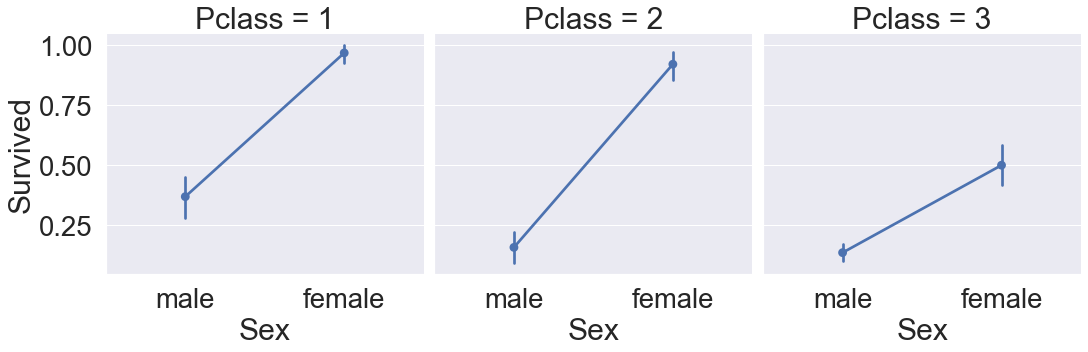

In [91]:
#if, hue 대신 col 이용하면?
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df_train,satureation=.5,aspect=1)

###  2.4 Age

In [92]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


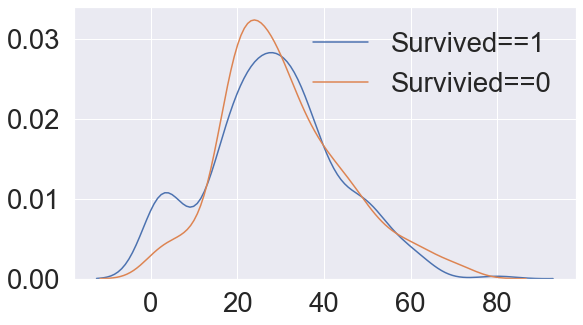

In [93]:
#생존에 따른 Age의 histogram
fig,ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived==1','Survivied==0'])
plt.show()


 - 생존자 들은 주로 나이가 어림.

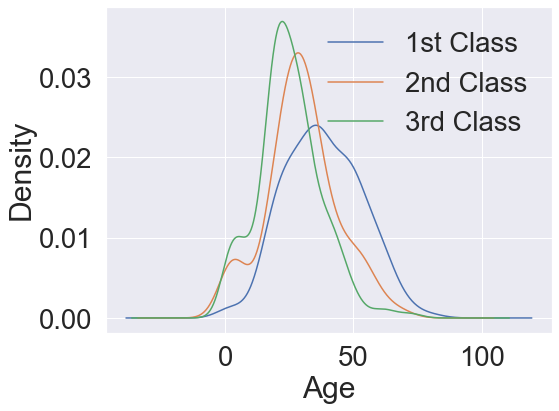

In [94]:
#Age distribusion withing classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(['1st Class','2nd Class','3rd Class'])

 - 나이가 많은 사람일 수록 Class가 높음
 - 나이대가 변하면서 생존률이 어떻게 되는지 알아보기

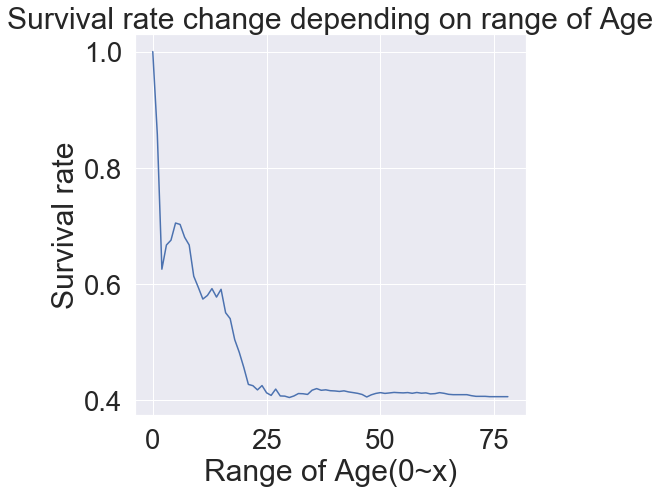

In [95]:
#cummulate_survival_ratio - 나이마다 살아남은 사람 평균 계산해서 list에 append
cummulate_survival_ratio=[]
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.xlabel('Range of Age(0~x)')
plt.ylabel('Survival rate')
plt.show()

- 나이가 어릴수록 생존률이 높다.
- 나이(Age)는 중요한 feature로 쓰일 수 있음

### 2.5 Pclass, Sex, Age 

- seaborn의 violinplot
- x축 : 우리가 나눠서 보고싶어하는 case
- y축 : 보고싶어하는 distribution
- sns.violinplot(x,y,hue,data,split,scale,ax)

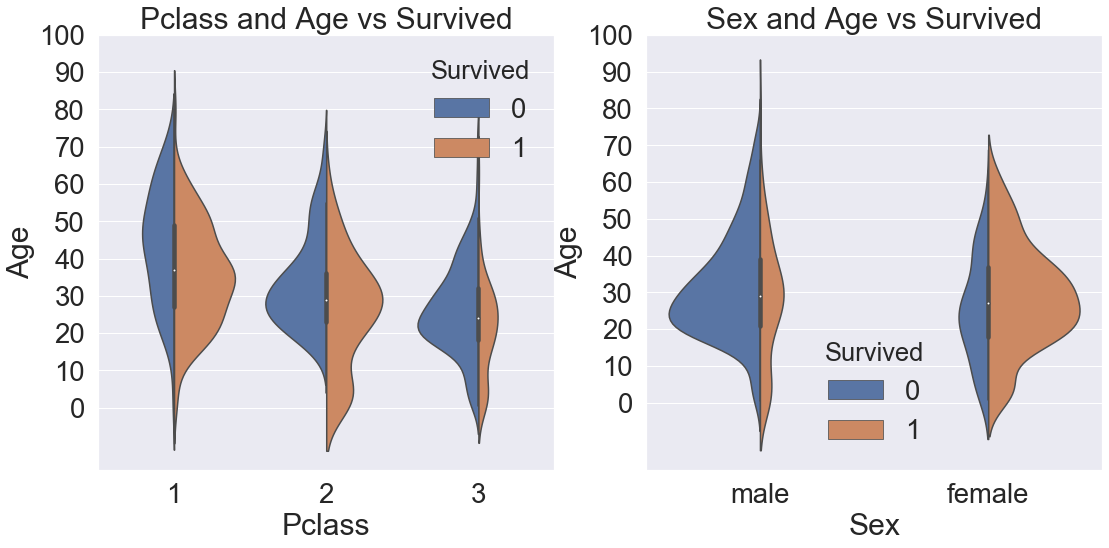

In [102]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- (왼쪽 그림) : Pclass 별로 Age의 distribution, 거기에 생존여부에 따라 구분.
- (왼쪽 결과) : 모든 클래스에서 나이가 어릴 수록 생존을 많이함.
    
- (오른쪽 그림) : Sex 별로 Age의 distribution, 거기에 생존여부에 따라 구분.
- (오른쪽 결과) : 명확히 여자가 생존을 많이함.
- (종합) : 나이가 어린 사람과 여자를 먼저 챙겼음.

### 2.6 Embarked 

- Embarked : 탑승한 항구

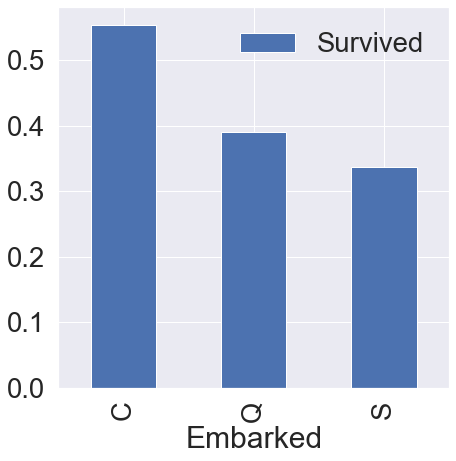

In [103]:
f,ax=plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

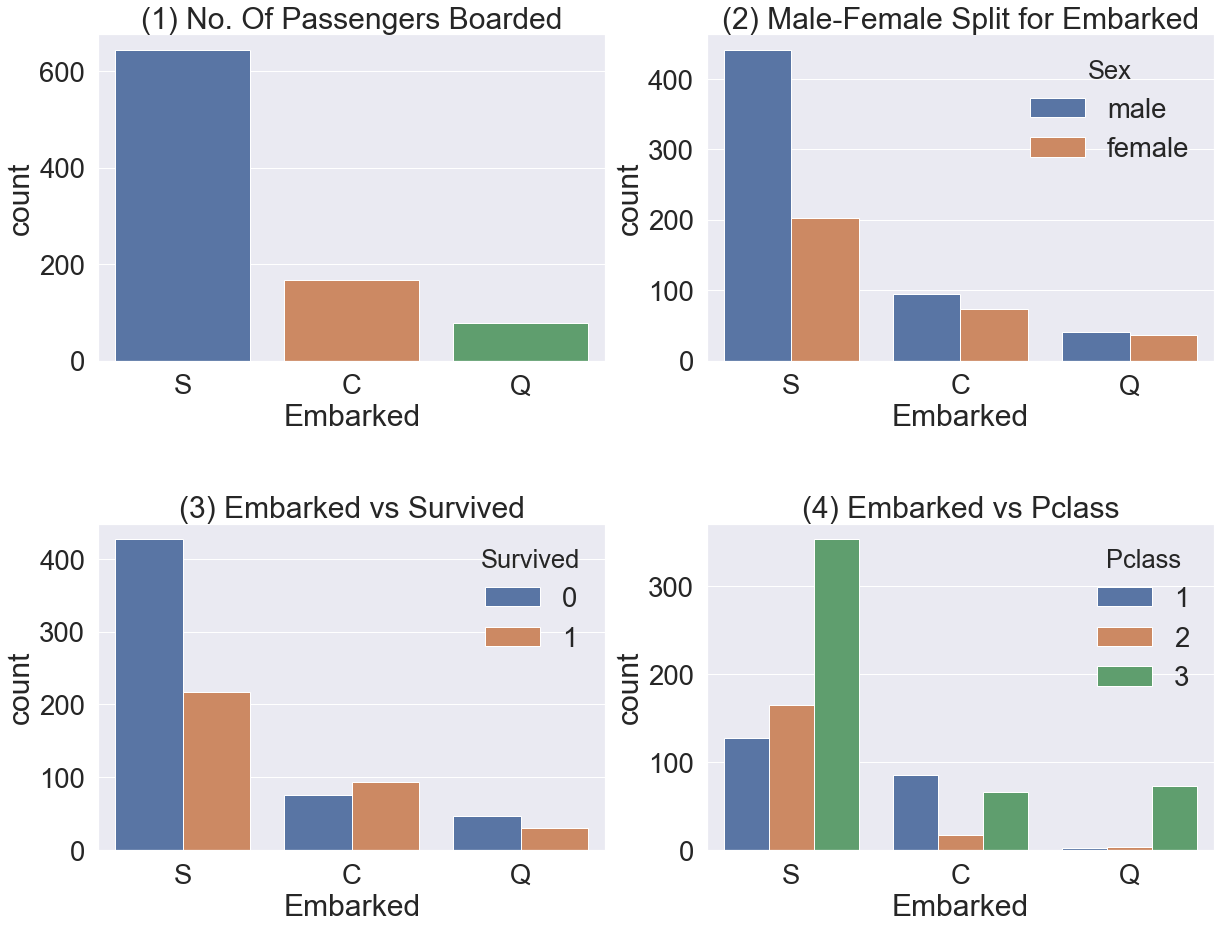

In [105]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승.
- Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많음.
- Figure(3) - 생존확률이 S 경우 낮음.
- Figure(4) - Class 로 split 한 결과 , C가 생존확률이 높은 이유는 클래스가 높은 사람이 많이 탔기 때문. S는 3rd class 가 많아서 생존확률이 낮게 나옴.

### 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀) 

In [106]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1 #자신을 포함해야하므로 1 더하기
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1

In [107]:
print("Maximum size of Family : ",df_train['FamilySize'].max())
print("Minimum size of Family : ",df_train['FamilySize'].min())

Maximum size of Family :  11
Minimum size of Family :  1


- FamilySize와 생존의 관계

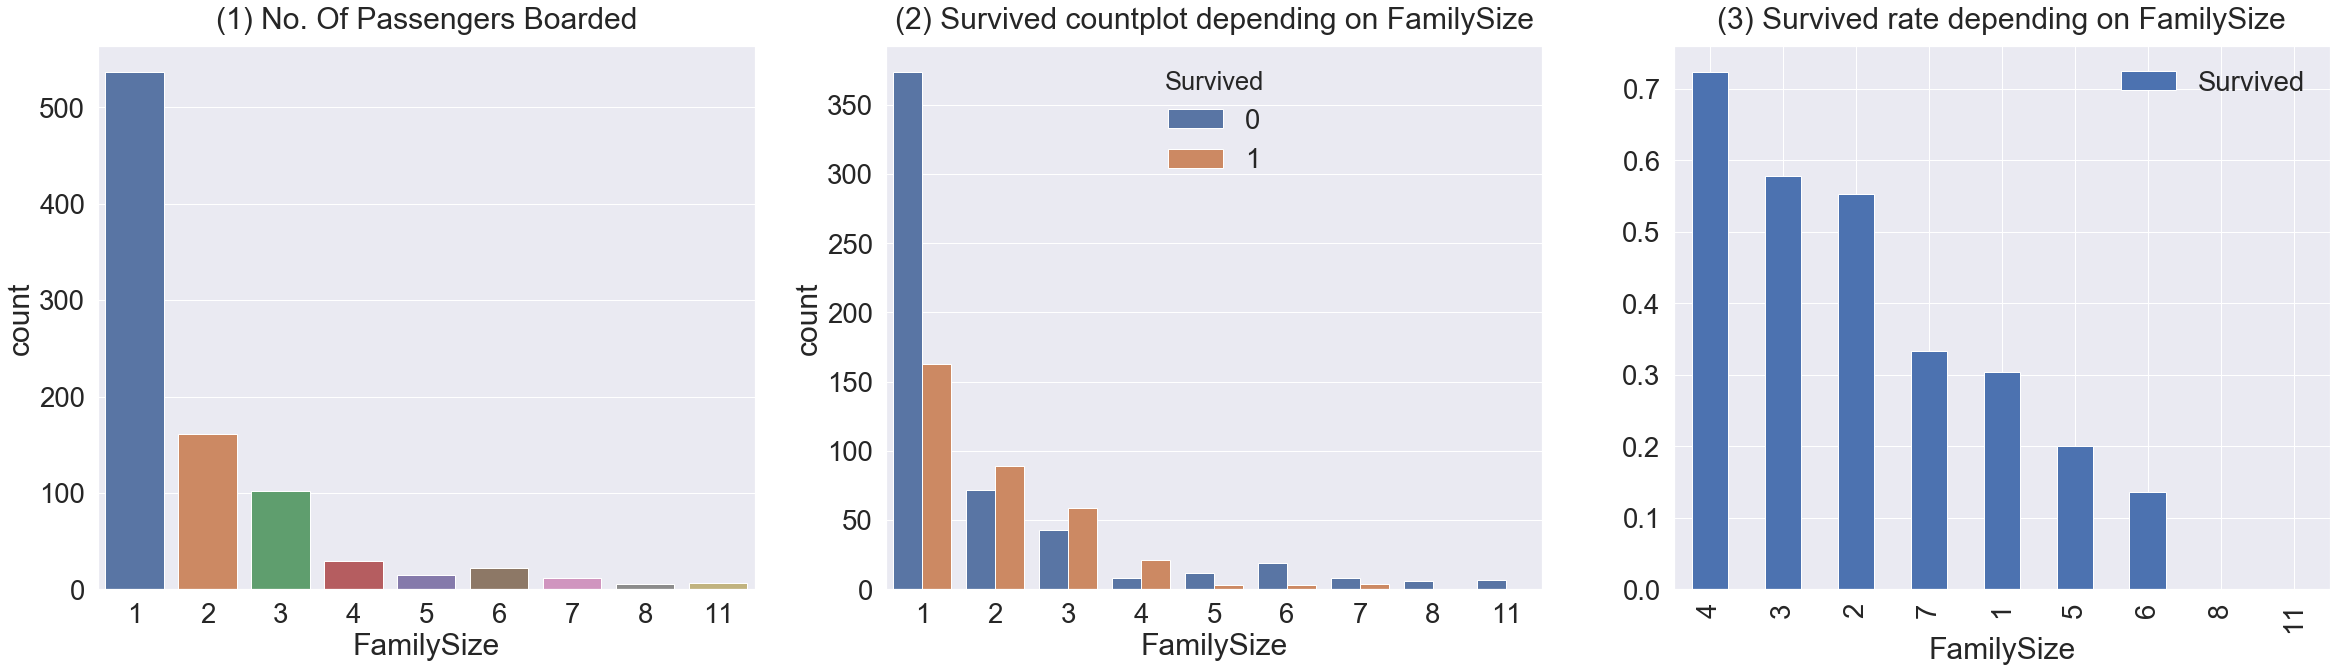

In [108]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure (1) - 가족크기 :  1~11. 대부분 1명이고 그 다음으로 2, 3, 4명.
- Figure (2), (3) - 가족 크기에 따른 생존비교. 가족이 4명인 경우가 가장 생존확률이 높음. 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아진다. 가족 수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작아짐.
- 3~4명 선에서 생존확률이 높은 걸 확인할 수 있음.

### 2.8 Fare

- Fare은 탑승요금이며, contious feature 임.

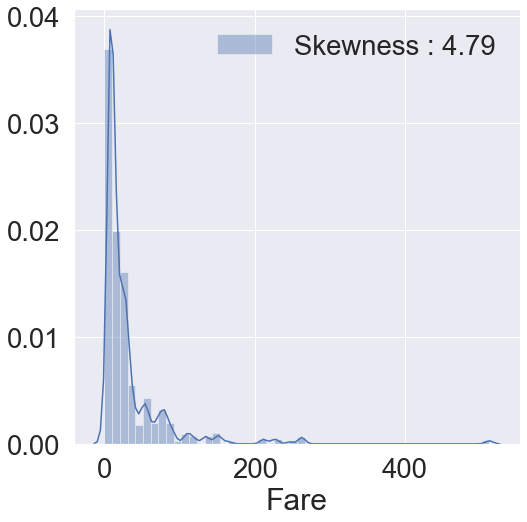

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- distribution이 매우 치우쳐져 있음.
- log 취하기!

In [111]:
#df_test data ['Fare'] 값 중 null 값을 평균값으로 대체
df_test.loc[df_test.Fare.isnull(),'Fare']=df_test['Fare'].mean()

In [112]:
df_train['Fare']=df_train['Fare'].map(lambda i:np.log(i) if i>0 else 0)
df_train['Fare']=df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)

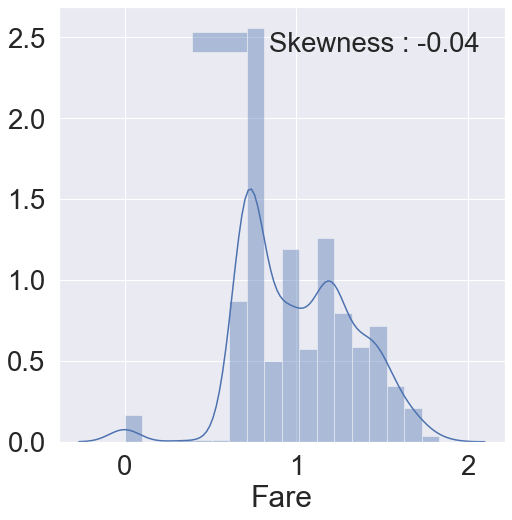

In [114]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
g=sns.distplot(df_train['Fare'],color='b',label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g=g.legend(loc='best')

- log를 취하니, 비대칭성이 완화됨.
- 모델 성능 향상 가능
- 모델 학습 또는 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하는 것을 feature engineering 이라고 함.

### 2.9 Cabin - NaN이 80% 이므로 해당 feature는 model에 포함 X 

In [115]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.683603,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.450832,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.727559,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.379314,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.735091,NaN,S,1


### 2.10 Ticket 

- String Data 이므로 작업을 거쳐야지 실제 모델에 사용 가능

In [116]:
df_train['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
315096      1
367232      1
347078      1
234686      1
350407      1
Name: Ticket, Length: 681, dtype: int64

- (?) Ticket에서 이끌어내야할 특징

-------------------------------------------------------------------------------------